# ASSIGNMENT 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

Tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại (2, 2), (8, 3), (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cụm có 200 điểmđiểm

In [3]:
np.random.seed(10)

u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6]
cov = [[1, 0], [0, 1]]
N = 200

cluster1 = np.random.multivariate_normal(u1, cov, N)
cluster2 = np.random.multivariate_normal(u2, cov, N)
cluster3 = np.random.multivariate_normal(u3, cov, N)

clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
k = 3
original_label = np.repeat([0, 1, 2], N)

In [4]:
def kmeans_display(clusters, labels, centroids=None):
    cluster1 = clusters[labels == 0]
    cluster2 = clusters[labels == 1]
    cluster3 = clusters[labels == 2]
    
    style_args = {'markersize': 5, 'alpha': 0.8, 'markeredgecolor': 'k'}
    plt.plot(cluster1[:, 0], cluster1[:, 1], 'b^', label='Cluster 1', **style_args)
    plt.plot(cluster2[:, 0], cluster2[:, 1], 'go', label='Cluster 2', **style_args)
    plt.plot(cluster3[:, 0], cluster3[:, 1], 'rs', label='Cluster 3', **style_args)

    # Vẽ dấu X tại các centroid
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    marker='X', s=90, c='orange', linewidths=0.3, 
                    label='Centroids', zorder=10)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.legend()
    plt.show()


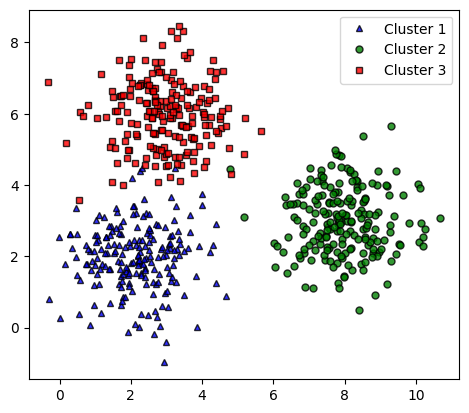

In [5]:
kmeans_display(clusters, original_label)

- kmeans_init_centroids — khởi tạo tâm cụm
- kmeans_assign_labels — gán nhãn cho mỗi điểm dựa trên tâm cụm gần nhất
- kmeans_update_centroids — cập nhật tâm cụm mới
- kmeans_converged — kiểm tra điều kiện hội tụ

In [6]:
from scipy.spatial.distance import cdist

def kmeans_init_centroids(X, k):
    random_idx = np.random.choice(X.shape[0], k, replace=False)
    return X[random_idx]

def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids) 
    return np.argmin(D, axis=1) 

def kmeans_update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
        else:
            # Nếu cluster rỗng, chọn lại ngẫu nhiên một điểm làm centroid
            centroids[i] = X[np.random.choice(X.shape[0])]
    return centroids

def kmeans_converged(centroids, new_centroids, tol=1e-6):
    return np.linalg.norm(centroids - new_centroids) < tol

def kmeans(X, k, max_iters=100):
    centroids = kmeans_init_centroids(X, k)
    for it in range(1, max_iters + 1):
        labels = kmeans_assign_labels(X, centroids)
        new_centroids = kmeans_update_centroids(X, labels, k)
        if kmeans_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, it
def compute_loss(X, labels, centroids):
    return np.sum((X - centroids[labels])**2)

K-means hội tụ sau 4 vòng lặp.
Toạ độ centroids cuối cùng:
[[7.96721295 2.98128265]
 [2.10539793 1.93909392]
 [2.98686864 5.97361989]]


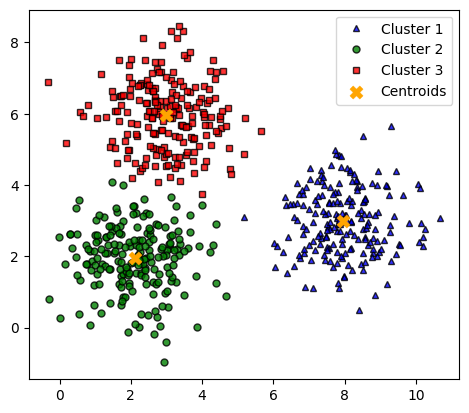

In [8]:
k = 3
centroids, labels, it = kmeans(clusters, k)

print(f"K-means hội tụ sau {it} vòng lặp.")
print("Toạ độ centroids cuối cùng:")
print(centroids)

kmeans_display(clusters, labels, centroids)


Về phân bố dữ liệu ban đầu (original_label):
- Số cụm rõ ràng và rời rạc: mỗi cụm có độ dày ở giữa và loãng dần ra bên ngoài, phù hợp với đặc trưng của phân phối Gaussian. 
- Vị trí cụm tương ứng với các phân phối đã cho.
- Độ phân tách giữa các cụm tốt: ít bị chồng lấn giữa các cụm
- Hình dạng cụm phù hợp với giả định K-means.

Sau khi áp dụng K-means, ta thấy:
- Phân cụm nhìn chung chính xác: 3 cụm cluster1, cluster2, cluster3 được phân tách rõ ràng và gần đúng với trực quan của dữ liệu, các cụm không bị chồng lấn nhau. Các centroids tìm được khá gần với kỳ vọng ban đầu, mặc dù màu sắc của hai cụm xanh, lục bị hoán đổi nhưng những điểm ban đầu thuộc cùng một cluster vẫn cùng một cluster.
- Kết quả phụ thuộc nhiều vào kết quả ban đầu: hội tụ sau 3 vòng lặp, chứng tỏ khởi tạo ban đầu khá tốt.
- Tuy nhiên, không thể đảm bảo đây là phân cụm tối ưu toàn cục. Nếu có nhiều nhiễu, dữ liệu lệch tâm hoặc số cụm k chưa hợp lý -> dễ gây phân cụm sai 

Tóm lại, trong assignment 1, kết quả phân cụm từ K-means tốt và hội tụ nhanh nhờ khởi tạo ban đầu khá phù hợp. Nếu thay đổi khởi tạo, kết quả có thể rất khác. 

KẾT QUẢ TỪ THƯ VIỆN SCIKIT-LEARN

Centers found by Scikit-learns
[[7.96721295 2.98128265]
 [2.98686864 5.97361989]
 [2.10539793 1.93909392]]


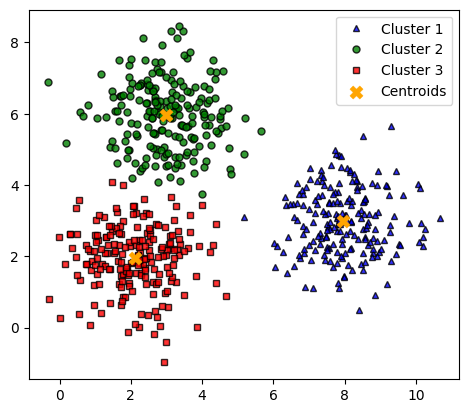

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(clusters)
print('Centers found by Scikit-learns')
print(model.cluster_centers_)
pred_label = model.predict(clusters)
kmeans_display(clusters, pred_label, model.cluster_centers_)

Thuật toán KMeans của Scikit-learn cho kết quả phân cụm tương đồng với phương pháp thủ công, cả về nhãn cụm và vị trí tâm cụm. Điều này cho thấy mô hình đã hội tụ tốt và thuật toán hoạt động ổn định trên dữ liệu đầu vào. Scikit-learn đảm bảo tính chính xác, tốc độ và khả năng mở rộng cho các ứng dụng thực tế.

In [12]:
def plot_kmeans_background(model, clusters):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Tạo lưới điểm để vẽ nền
    x_min, x_max = clusters[:, 0].min() - 1, clusters[:, 0].max() + 1
    y_min, y_max = clusters[:, 1].min() - 1, clusters[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    distances = np.linalg.norm(grid_points[:, None, :] - model.cluster_centers_[None, :, :], axis=2)
    labels_grid = np.argmin(distances, axis=1)
    
    # Background
    colors = np.array([
        [0.7, 0.85, 1.0], 
        [0.8, 1.0, 0.8],  
        [1.0, 0.8, 0.8]   
    ])
    background_colors = colors[labels_grid]
    
    # Vẽ nền
    plt.figure(figsize=(8,6))
    plt.scatter(grid_points[:, 0], grid_points[:, 1], color=background_colors, s=5, marker='s', alpha=0.3)


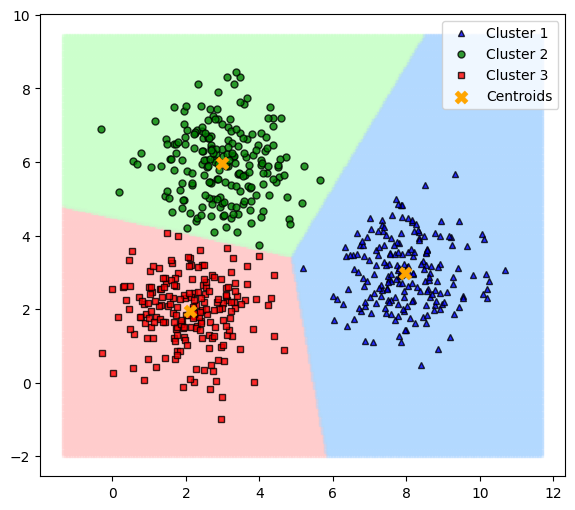

In [9]:
plot_kmeans_background(model, clusters)
kmeans_display(clusters, model.predict(clusters), model.cluster_centers_)

In [10]:
def run_kmeans_multiple_seeds(X, k, seeds, max_iters=100):
    best_loss = float('inf')
    best_result = None

    for seed in seeds:
        np.random.seed(seed)
        centroids, labels, it = kmeans(X, k, max_iters)
        loss = compute_loss(X, labels, centroids)
        print(f"Seed: {seed} | Iterations: {it} | Loss: {loss:.2f}")
        
        if loss < best_loss:
            best_loss = loss
            best_result = (centroids, labels, it, seed)

    print(f"\n Best seed: {best_result[3]} with loss = {best_loss:.2f}")
    return best_result  # Trả về kết quả tốt nhất


In [11]:
seeds = range(0, 10)
best_centroids, best_labels, best_iter, best_seed = run_kmeans_multiple_seeds(clusters, k=3, seeds=seeds)

Seed: 0 | Iterations: 4 | Loss: 1059.61
Seed: 1 | Iterations: 5 | Loss: 1059.61
Seed: 2 | Iterations: 4 | Loss: 1059.61
Seed: 3 | Iterations: 4 | Loss: 1059.61
Seed: 4 | Iterations: 5 | Loss: 1059.61
Seed: 5 | Iterations: 4 | Loss: 1059.61
Seed: 6 | Iterations: 5 | Loss: 1059.61
Seed: 7 | Iterations: 3 | Loss: 1059.61
Seed: 8 | Iterations: 5 | Loss: 1059.61
Seed: 9 | Iterations: 4 | Loss: 1059.61

 Best seed: 0 with loss = 1059.61


Kết quả cho thấy thuật toán K-means hội tụ nhanh (3-5 vòng lặp), loss ổn định và giống nhau cho các seed khác nhau, chứng tỏ khởi tạo centroid ngẫu nhiên đều hợp lý và thuật toán hoạt động tốt, ổn định trên dữ liệu toy. Đây là kết quả mong muốn, thể hiện việc khởi tạo centroid ảnh hưởng đến tốc độ hội tụ nhưng kết quả cuối cùng vẫn nhất quán.

In [11]:
import numpy as np
for i in range(6):
    np.random.seed(9+i)
    centroids, labels, it = kmeans(clusters, k)
    print("seed number: ", 9+i, "number of iterations:", it)

seed number:  9 number of iterations: 4
seed number:  10 number of iterations: 3
seed number:  11 number of iterations: 15
seed number:  12 number of iterations: 9
seed number:  13 number of iterations: 5
seed number:  14 number of iterations: 3


- Kết quả cho thấy K-means hội tụ nhanh với hầu hết các seed (3–5 vòng), chỉ vài seed mất nhiều vòng hơn (tối đa 15) do khởi tạo không tối ưu. Điều này chứng tỏ thuật toán ổn định và nhạy với điểm khởi tạo.
- Số vòng lặp hội tụ của K-means thay đổi theo seed khởi tạo vì thuật toán nhạy với vị trí centroid ban đầu. Seed tốt giúp hội tụ nhanh, seed kém làm chậm quá trình. Tuy nhiên, kết quả cuối cùng về loss thường tương tự.

In [12]:
for i in range(60):
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    print(centroids[-1])

[7.96721295 2.98128265]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.98686864 5.97361989]
[2.98686864 5.97361989]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[2.53852763 3.98539818]
[8.41995689 3.63898619]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[7.96721295 2.98128265]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[7.96721295 2.98128265]
[7.96721295 2.98128265]
[8.23257574 2.41167509]
[7.22699444 2.24231071]
[2.10539793 1.93909392]
[7.96721295 2.98128265]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.98686864 5.97361989]
[2.10539793 1.93909392]
[2.10539793 1.93909392]
[7.32193133 3.41576958]
[2.98686864 5.97361989]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[2.98686864 5.97

Các centroid không trùng nhau 

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def kmeans_display_with_background(clusters, centroids, labels, it):
    x_min, x_max = clusters[:, 0].min() - 1, clusters[:, 0].max() + 1
    y_min, y_max = clusters[:, 1].min() - 1, clusters[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    distances = np.linalg.norm(grid_points[:, None, :] - centroids[None, :, :], axis=2)
    labels_grid = np.argmin(distances, axis=1)
    
    colors = np.array([
        [0.7, 0.85, 1.0], 
        [0.8, 1.0, 0.8],  
        [1.0, 0.8, 0.8]   
    ])
    background_colors = colors[labels_grid]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(grid_points[:, 0], grid_points[:, 1], color=background_colors, s=5, marker='s', alpha=0.3)

    # Gọi lại kmeans_display để vẽ các cụm
    kmeans_display(clusters, labels, centroids)


10


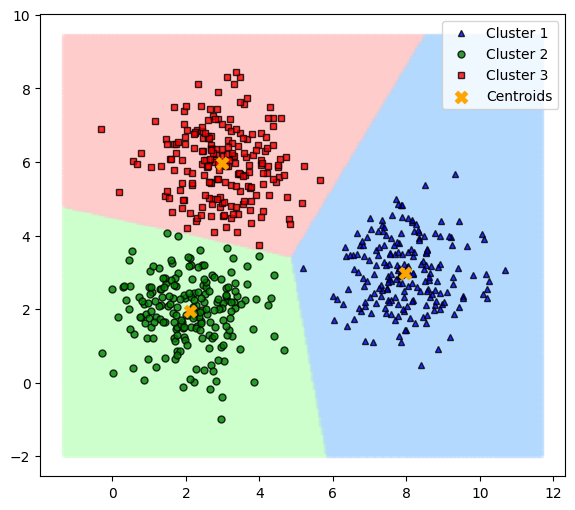

33


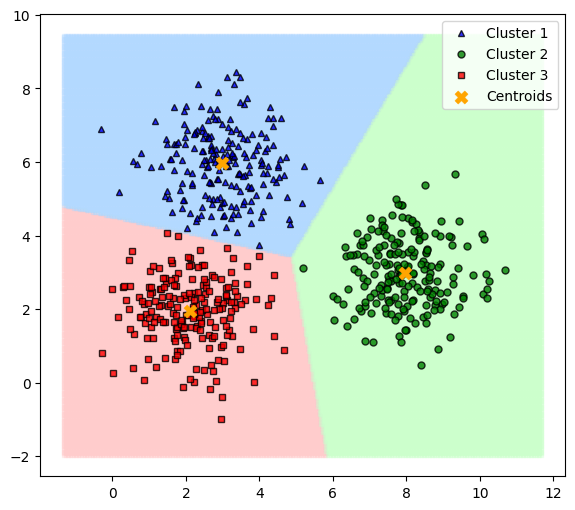

27


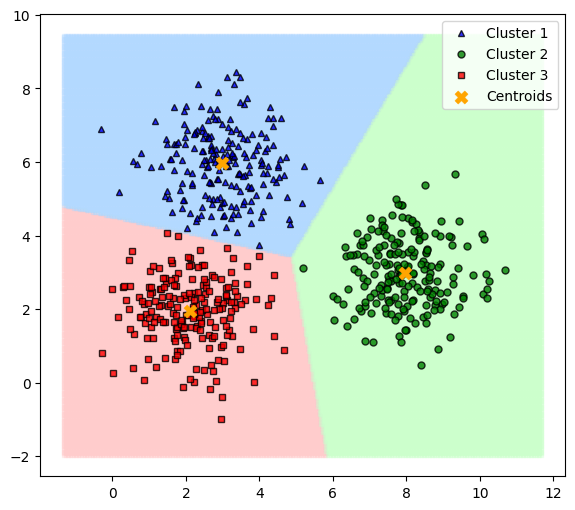

In [14]:
for i in [10, 33, 27]:
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    it = len(labels) - 1
    print(i)
    kmeans_display_with_background(clusters, centroids, labels, it)

Việc khởi tạo tâm cụm (centroids) ngẫu nhiên ảnh hưởng đáng kể đến hiệu suất của K-Means vì:

Nếu các tâm cụm ban đầu được chọn gần nhau hoặc không đại diện, thuật toán có thể:

- Hội tụ chậm hơn
- Rơi vào cực trị địa phương
- Phân cụm sai lệch

Ngược lại, nếu khởi tạo tốt, K-Means sẽ:

- Hội tụ nhanh
- Tìm được phân cụm chính xác hơn

Kết luận: Khởi tạo ngẫu nhiên làm cho kết quả K-Means không ổn định, vì vậy nên chạy nhiều lần với các seed khác nhau hoặc sử dụng phương pháp khởi tạo tốt hơn

# ASSIGNMENT 2 

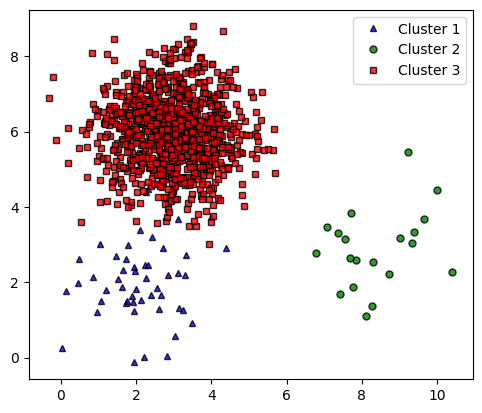

In [12]:
np.random.seed(10)

u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6] 
cov = [[1, 0], [0, 1]]
N = [50, 20, 1000]

cluster1 = np.random.multivariate_normal(u1, cov, 50)
cluster2 = np.random.multivariate_normal(u2, cov, 20)
cluster3 = np.random.multivariate_normal(u3, cov, 1000)
clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
original_label = np.repeat([0, 1, 2], N)

kmeans_display(clusters, original_label)

K-means hội tụ sau 27 vòng lặp.
Toạ độ centroids cuối cùng:
[[2.35212925 4.0274731 ]
 [4.32835926 5.50403592]
 [2.56190952 6.50725446]]


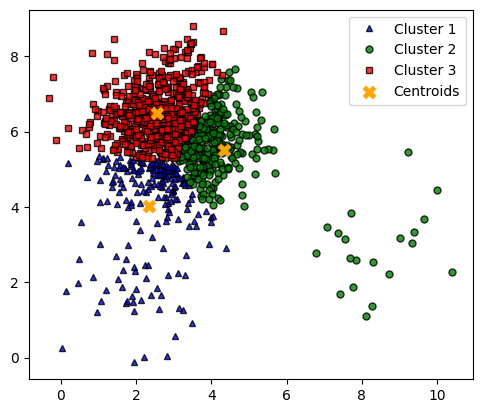

In [87]:
k = 3
(centroids, labels, it) = kmeans(clusters, k)

print(f"K-means hội tụ sau {it} vòng lặp.")
print("Toạ độ centroids cuối cùng:")
print(centroids)

kmeans_display(clusters, labels, centroids)

Các centroid đều nằm gần vùng dữ liệu ban đầu, nhưng khác so với các điểm trung bình gốc:

- Cụm 3 ban đầu có tâm tại (3, 6) nhưng centroid cuối lại thành (2.56, 6.5) lệch khá nhiều về trục x.

- Cụm 1 và 2 ban đầu ở (2,2) và (8,3) thì centroid mới lại lẫn lộn quanh (2.35, 4.03) và (4.33, 5.5), tức cả hai centroid này dường như “dồn vào nhau” hơn.

Nguyên nhân chính:

Cụm lớn (với 1000 điểm) có trọng lượng rất lớn, kéo các centroid nhỏ về phía mình.

Các điểm nhỏ lẻ, phân tán ở các vị trí ban đầu (như cụm nhỏ 20 điểm gần (8,3)) có thể bị cụm lớn “hút” và gộp nhầm.

Qua đó có thể thấy:
- K-means ưu tiên tối thiểu tổng bình phương khoảng cách (WCSS), không quan tâm phân bố ban đầu hoặc tỷ lệ cụm.

- Các centroid có thể dịch chuyển đáng kể, đặc biệt khi số lượng điểm giữa các cụm chênh lệch lớn.

- Kết quả centroid cuối cùng cho thấy các cụm nhỏ không còn giữ vị trí ban đầu, có thể bị hòa lẫn hoặc lệch.


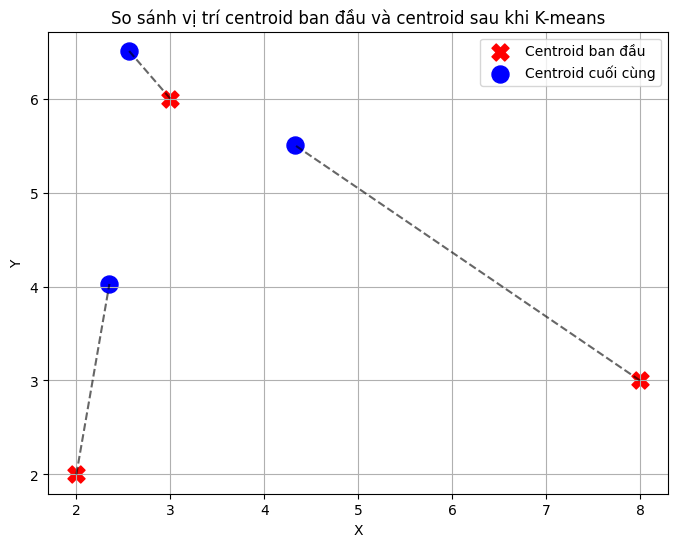

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Tọa độ centroid ban đầu 
initial_centroids = np.array([
    [2, 2],
    [8, 3],
    [3, 6]
])

centroids_final = np.array([
    [2.35212925, 4.0274731],
    [4.32835926, 5.50403592],
    [2.56190952, 6.50725446]
])

plt.figure(figsize=(8,6))
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
            c='red', marker='X', s=150, label='Centroid ban đầu')
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], 
            c='blue', marker='o', s=150, label='Centroid cuối cùng')

for i in range(len(initial_centroids)):
    plt.plot([initial_centroids[i, 0], centroids_final[i, 0]],
             [initial_centroids[i, 1], centroids_final[i, 1]], 'k--', alpha=0.6)

plt.title('So sánh vị trí centroid ban đầu và centroid sau khi K-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Centers found by Scikit-learns
[[2.62265395 4.29930087]
 [3.02933502 6.37283148]
 [8.38173153 2.89756777]]


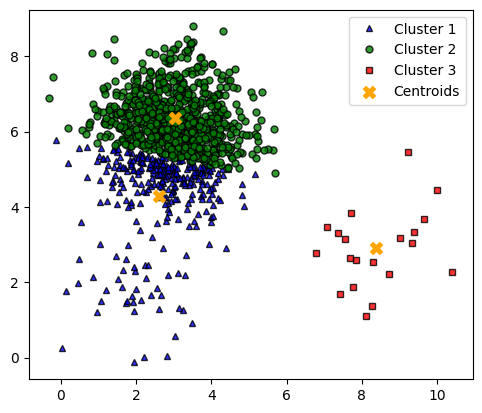

In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(clusters)
print('Centers found by Scikit-learns')
print(model.cluster_centers_)
pred_label = model.predict(clusters)
kmeans_display(clusters, pred_label, model.cluster_centers_)

Màu sắc các cụm thay đổi vị trí

[2.6226, 4.2993]
- Trung tâm mới của cụm gồm điểm từ cluster1 và một phần cluster3. Do cluster1 chỉ có 50 điểm, còn cluster3 tới 1000 điểm nên centroid bị kéo về phía cluster3. Đây có thể là cụm “trộn” giữa cluster1 và cluster3.

[3.0293, 6.3728]
- Gần với cluster3 gốc [3, 6] → rất nhiều điểm nên tâm cụm này khá ổn định. Đây gần như chắc chắn là cụm đại diện cho cluster3.

[8.3817, 2.8976]
- Gần với cluster2 gốc [8, 3], cụm nhỏ chỉ có 20 điểm → tuy nhỏ nhưng vẫn được tách riêng nhờ cách ly rõ rệt về không gian. Đây là cluster2, mặc dù ít điểm nhưng vị trí tốt nên vẫn được tách riêng.

Tuy nhiên:
- Cluster1 bị “nhấn chìm” một phần bởi cluster3.
- Cluster3 giữ được vị trí do số điểm lớn.
- Cluster2 được giữ nguyên do tách biệt trong không gian.

Nguyên nhân có thể do: 
- KMeans bị ảnh hưởng bởi số lượng điểm trong cụm do nó tối ưu tổng khoảng cách.
- Cluster3 có 1000 điểm → rất “nặng”, dễ kéo tâm cụm về phía mình.
- Cluster1 chỉ có 50 điểm → dễ bị hoà vào cụm lớn hơn.
- Cluster2 tuy nhỏ nhưng cách biệt, nên vẫn được giữ riêng.

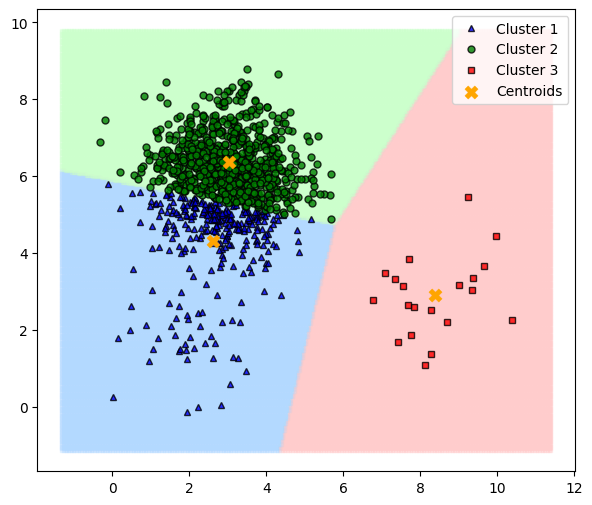

In [70]:
plot_kmeans_background(model, clusters)
kmeans_display(clusters, model.predict(clusters), model.cluster_centers_)

- Cluster 3 (1000 điểm) chiếm ưu thế lớn → centroid rất ổn định.
- Cluster 1 (50 điểm) và Cluster 2 (20 điểm) bị ảnh hưởng bởi cụm lớn → dễ bị lệch hoặc gán sai nhãn.
- K-means không phù hợp với dữ liệu mất cân bằng vì nhạy cảm với kích thước cụm.
- Nhãn sau phân cụm có thể bị hoán đổi do K-means gán nhãn ngẫu nhiên.

In [101]:
seeds = range(0, 10)
best_centroids, best_labels, best_iter, best_seed = run_kmeans_multiple_seeds(clusters, k=3, seeds=seeds)

Seed: 0 | Iterations: 18 | Loss: 1843.62
Seed: 1 | Iterations: 13 | Loss: 1843.58
Seed: 2 | Iterations: 17 | Loss: 1843.62
Seed: 3 | Iterations: 17 | Loss: 1843.72
Seed: 4 | Iterations: 11 | Loss: 1855.50
Seed: 5 | Iterations: 15 | Loss: 1855.63
Seed: 6 | Iterations: 17 | Loss: 1855.63
Seed: 7 | Iterations: 18 | Loss: 1855.63
Seed: 8 | Iterations: 13 | Loss: 1843.58
Seed: 9 | Iterations: 18 | Loss: 1855.63

 Best seed: 1 with loss = 1843.58


Trong 10 lần chạy thử seed 1 cho kết quả tốt nhất vì loss thấp nhất

In [102]:
import numpy as np
for i in range(6):
    np.random.seed(9+i)
    centroids, labels, it = kmeans(clusters, k)
    print("seed number: ", 9+i, "number of iterations:", it)

seed number:  9 number of iterations: 18
seed number:  10 number of iterations: 27
seed number:  11 number of iterations: 24
seed number:  12 number of iterations: 13
seed number:  13 number of iterations: 20
seed number:  14 number of iterations: 18


Số vòng lặp (iterations) trong K-means biến động khi thay đổi seed, không ổn định. Seed 10 cần nhiều vòng lặp nhất (27), seed 12 ít nhất (13). Điều này cho thấy kết quả và tốc độ hội tụ của K-means phụ thuộc nhiều vào giá trị seed khởi tạo.

In [103]:
for i in range(60):
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    print(centroids[-1])

[2.35212925 4.0274731 ]
[2.35212925 4.0274731 ]
[4.32835926 5.50403592]
[4.31040299 5.5194038 ]
[3.72918536 2.88182004]
[3.66932269 3.13061997]
[3.66932269 3.13061997]
[2.13407235 5.94818384]
[4.30644688 5.51900524]
[2.13407235 5.94818384]
[8.38173153 2.89756777]
[2.56190952 6.50725446]
[3.70754084 6.26064429]
[3.73909669 6.22873257]
[3.66932269 3.13061997]
[2.33542069 3.47140774]
[8.38173153 2.89756777]
[2.13399843 5.94420707]
[2.56190952 6.50725446]
[3.67967275 2.53449505]
[2.35212925 4.0274731 ]
[3.73909669 6.22873257]
[3.70754084 6.26064429]
[2.50060493 6.3749716 ]
[2.13399843 5.94420707]
[3.70754084 6.26064429]
[4.30644688 5.51900524]
[2.36939934 3.99666796]
[2.33284312 3.51414367]
[2.54873401 6.51333213]
[2.14379455 5.92517443]
[2.50774006 6.4193567 ]
[3.70600074 6.22077584]
[3.71922042 6.24039982]
[3.54629207 2.80101927]
[3.68178001 3.12293452]
[2.35212925 4.0274731 ]
[3.71922042 6.24039982]
[4.31106168 5.52601793]
[3.72918536 2.88182004]
[2.55725827 6.50635485]
[3.70754084 6.26

10


C:\Users\Hp X2 G3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


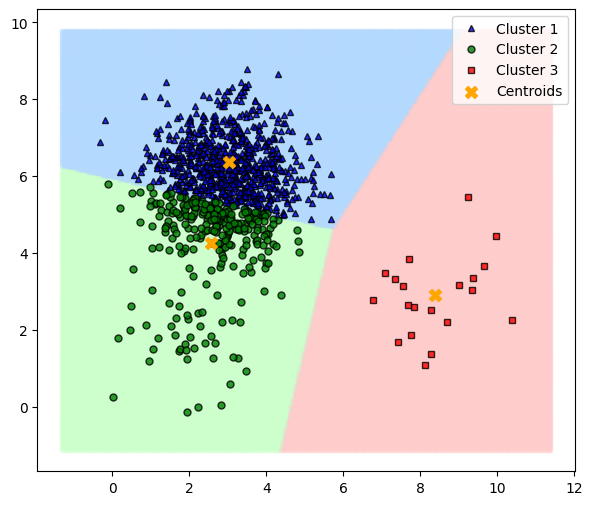

33


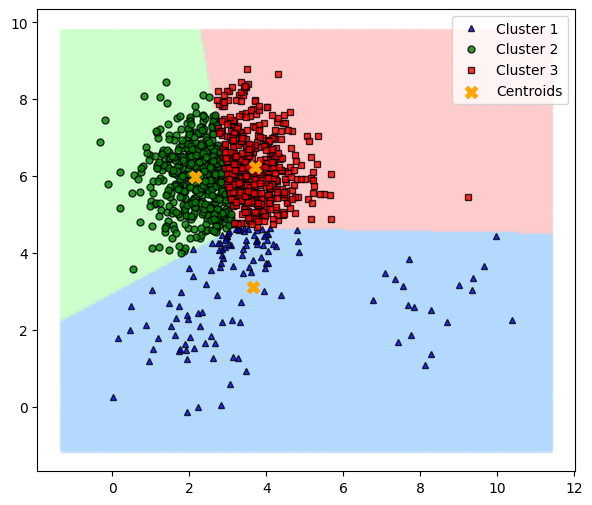

27


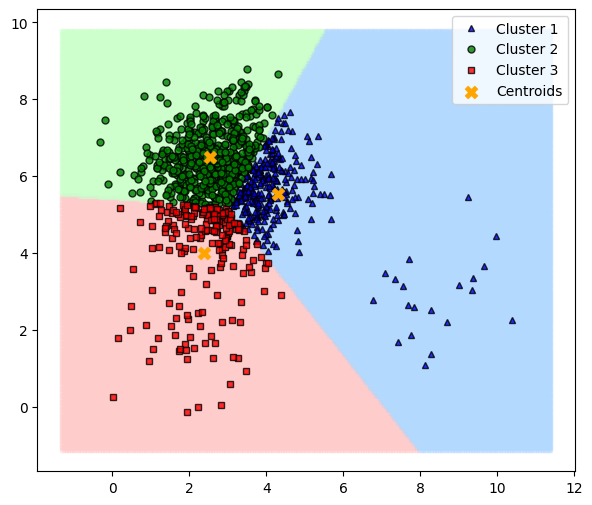

In [104]:
for i in [10, 33, 27]:
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    it = len(labels) - 1
    print(i)
    kmeans_display_with_background(clusters, centroids, labels, it)

Với từng seed khác nhau, các cụm phân bố khác biệt.

Trong bài toán này, ba cụm có kích thước rất khác nhau: 50, 20, và 1000 điểm. Điều này ảnh hưởng lớn đến hiệu suất của K-Means vì thuật toán này tối ưu tổng bình phương khoảng cách đến tâm cụm, nên cụm có nhiều điểm hơn sẽ chi phối mạnh hơn trong quá trình huấn luyện.

Hệ quả là:

- Cụm lớn (1000 điểm) có thể kéo tâm cụm về phía mình, làm lệch ranh giới phân cụm.
- Các cụm nhỏ (50 và 20 điểm) dễ bị gộp chung hoặc bỏ qua, dẫn đến phân cụm sai.
- Kết quả phân cụm không phản ánh đúng cấu trúc thực tế của dữ liệu.

Kết luận: K-Means không phù hợp khi các cụm có kích thước chênh lệch lớn, và cần được thay thế hoặc cải tiến 

# ASSIGNMENT 3

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6]

cov1 = [[1, 0], [0, 1]]
cov2 = [[1, 0], [0, 1]]
cov3 = [[10, 0], [0, 1]] 
N = 200

cluster1 = np.random.multivariate_normal(u1, cov1, N)
cluster2 = np.random.multivariate_normal(u2, cov2, N)
cluster3 = np.random.multivariate_normal(u3, cov3, N)

clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
original_labels = np.repeat([0, 1, 2], N)


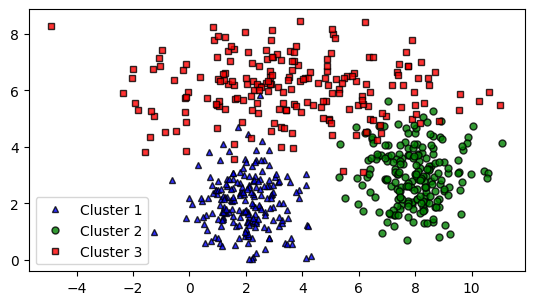

In [27]:

kmeans_display(clusters, original_label)

Có thể thấy, cluster1 và cluster2 theo $\Sigma_1$ nên kích thước tròn đều (phân phối Gaussian có phương sai bằng 1 theo cả 2 chiều), còn cluster3 theo $\Sigma_2$ nên bị kéo dãn theo chiều ngang, tạo hình dạng elip dài hơn, không đối xứng như 2 cluster còn lại

K-means hội tụ sau 20 vòng lặp.
Toạ độ centroids cuối cùng:
[[7.84137863 3.49811562]
 [2.53481065 6.28740649]
 [1.94139558 2.07448304]]


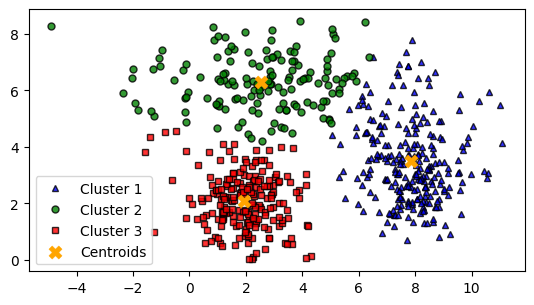

In [28]:
k = 3
centroids, labels, it = kmeans(clusters, k)

print(f"K-means hội tụ sau {it} vòng lặp.")
print("Toạ độ centroids cuối cùng:")
print(centroids)

kmeans_display(clusters, labels, centroids)


Thuật toán K-means đã hội tụ sau 20 vòng lặp, cho thấy quá trình cập nhật centroid và gán nhãn cho các điểm dữ liệu đã ổn định, không còn thay đổi đáng kể.

Quan sát vị trí centroid:

- Centroid đầu tiên gần với cluster có trung tâm (8,3).

- Centroid thứ hai gần với cluster có trung tâm (3,6), tuy nhiên vị trí có phần dịch lên trên so với điểm gốc do phân phối $\Sigma_2$
   kéo dãn theo chiều ngang.

- Centroid thứ ba gần với cluster có trung tâm (2,2).

Kết quả cho thấy K-means phân tách được khá chính xác 3 cụm theo dữ liệu, dù cluster thứ hai có phương sai khác biệt lớn theo chiều ngang.

Tuy nhiên, vì cluster thứ hai có phương sai lớn (kéo dãn theo chiều 
𝑥), centroid của cụm này có thể bị lệch so với vị trí trung tâm thực của phân phối do K-means sử dụng khoảng cách Euclid, không tính đến hình dạng hoặc phương sai cụm.

Điều này thể hiện giới hạn của K-means khi xử lý các cụm có kích thước hoặc hình dạng khác nhau, làm giảm hiệu quả phân cụm trong trường hợp phân phối không đồng nhất.



K-MEANS TỪ SCIKIT-LEARNS

Centers found by Scikit-learns
[[7.82773082 3.52419383]
 [2.44220016 6.25733703]
 [1.96713809 2.05011551]]


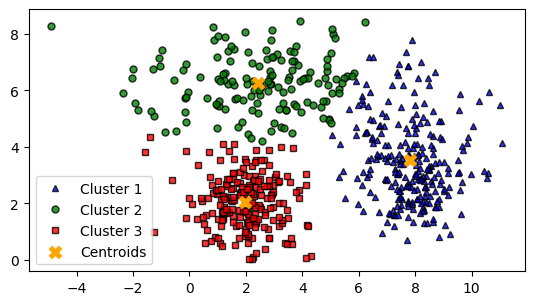

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(clusters)
print('Centers found by Scikit-learns')
print(model.cluster_centers_)
pred_label = model.predict(clusters)
kmeans_display(clusters, pred_label, model.cluster_centers_)

Không khác biệt mấy so với K-Means đã triển khai 

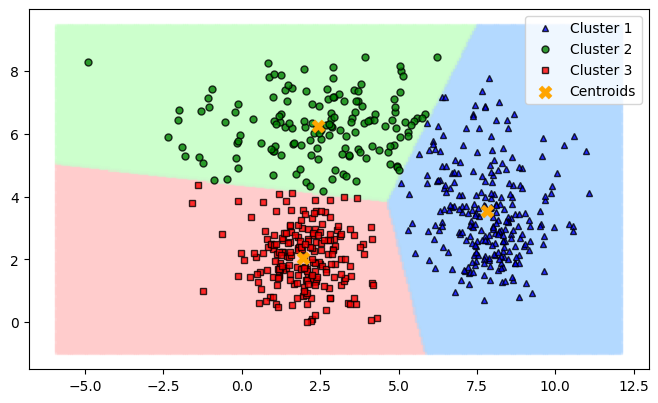

In [23]:
plot_kmeans_background(model, clusters)
kmeans_display(clusters, model.predict(clusters), model.cluster_centers_)

Cụm ở góc dưới trái (gần tọa độ (2, 2)):

- Các điểm tập trung tốt, cụm rõ ràng.
- Tâm cụm nằm gần trung tâm phân phối gốc → K-Means hoạt động tốt ở đây.

Cụm ở phía bên phải (gần tọa độ (8, 3)):
- Cũng là một cụm rõ ràng, các điểm gần nhau.
- Tâm cụm được xác định chính xác.

Cụm trải dài theo trục X (gần tọa độ (3, 6)):
- Đây là cụm từ phân phối có phương sai lớn 
Σ
2
​
 .
- Các điểm bị trải rộng theo chiều ngang, tạo thành một dải dài.
- Tâm cụm nằm gần trung tâm hình học, nhưng không phản ánh tốt cấu trúc phân phối.
- Một số điểm ở rìa cụm có thể bị gán nhầm sang cụm khác.

 Kết luận

- K-Means hoạt động tốt với các cụm có hình dạng tròn và phương sai đồng đều.
- Với cụm có phương sai lớn và hình dạng kéo dài, K-Means gặp khó khăn trong việc xác định ranh giới và tâm cụm chính xác.
- Điều này cho thấy K-Means không phù hợp với dữ liệu có phương sai không đồng nhất, và có thể cần dùng các thuật toán như Gaussian Mixture Models (GMM) để cải thiện.

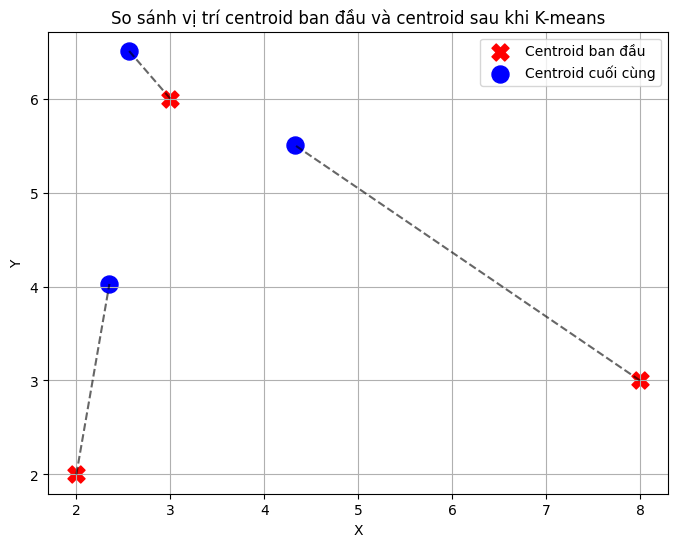

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Tọa độ centroid ban đầu 
initial_centroids = np.array([
    [2, 2],
    [8, 3],
    [3, 6]
])

centroids_final = np.array([
    [2.35212925, 4.0274731],
    [4.32835926, 5.50403592],
    [2.56190952, 6.50725446]
])

plt.figure(figsize=(8,6))
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
            c='red', marker='X', s=150, label='Centroid ban đầu')
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], 
            c='blue', marker='o', s=150, label='Centroid cuối cùng')

for i in range(len(initial_centroids)):
    plt.plot([initial_centroids[i, 0], centroids_final[i, 0]],
             [initial_centroids[i, 1], centroids_final[i, 1]], 'k--', alpha=0.6)

plt.title('So sánh vị trí centroid ban đầu và centroid sau khi K-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [25]:
seeds = range(0, 10)
best_centroids, best_labels, best_iter, best_seed = run_kmeans_multiple_seeds(clusters, k=3, seeds=seeds)

Seed: 0 | Iterations: 7 | Loss: 1985.76
Seed: 1 | Iterations: 10 | Loss: 1985.76
Seed: 2 | Iterations: 8 | Loss: 1985.32
Seed: 3 | Iterations: 8 | Loss: 1985.42
Seed: 4 | Iterations: 8 | Loss: 1985.32
Seed: 5 | Iterations: 13 | Loss: 1985.76
Seed: 6 | Iterations: 13 | Loss: 1985.76
Seed: 7 | Iterations: 6 | Loss: 1985.32
Seed: 8 | Iterations: 8 | Loss: 1985.32
Seed: 9 | Iterations: 7 | Loss: 1985.76

 Best seed: 2 with loss = 1985.32


Seed 2 là lựa chọn tốt nhất với loss thấp nhất và số vòng lặp hợp lý.
Kết quả cho thấy việc chạy K-Means nhiều lần với các khởi tạo khác nhau là cần thiết để tránh rơi vào cực trị địa phương.

In [31]:
import numpy as np
for i in range(10):
    np.random.seed(9+i)
    centroids, labels, it = kmeans(clusters, k)
    print("seed number: ", 9+i, "number of iterations:", it)

seed number:  9 number of iterations: 7
seed number:  10 number of iterations: 6
seed number:  11 number of iterations: 14
seed number:  12 number of iterations: 16
seed number:  13 number of iterations: 14
seed number:  14 number of iterations: 5
seed number:  15 number of iterations: 5
seed number:  16 number of iterations: 7
seed number:  17 number of iterations: 4
seed number:  18 number of iterations: 7


- Số vòng lặp dao động từ 4 đến 16, cho thấy mức độ hội tụ vẫn phụ thuộc vào khởi tạo ban đầu.
- Seed 17 hội tụ nhanh nhất (4 vòng), trong khi seed 12 cần đến 16 vòng → có thể do khởi tạo xa tâm cụm thực tế.
- Nhiều seed hội tụ trong 5–7 vòng, cho thấy thuật toán khá ổn định trong phần lớn trường hợp.

In [32]:
for i in range(60):
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    print(centroids[-1])

[7.84137863 3.49811562]
[1.94139558 2.07448304]
[2.44220016 6.25733703]
[1.9532001  2.06229938]
[7.82773082 3.52419383]
[7.84137863 3.49811562]
[2.53481065 6.28740649]
[2.44220016 6.25733703]
[1.96713809 2.05011551]
[7.84137863 3.49811562]
[2.44220016 6.25733703]
[1.94139558 2.07448304]
[2.53481065 6.28740649]
[1.94139558 2.07448304]
[2.53481065 6.28740649]
[7.82773082 3.52419383]
[7.82773082 3.52419383]
[2.47872491 6.22756731]
[1.94139558 2.07448304]
[1.94139558 2.07448304]
[7.84137863 3.49811562]
[2.44220016 6.25733703]
[7.84137863 3.49811562]
[7.84137863 3.49811562]
[1.94139558 2.07448304]
[7.82773082 3.52419383]
[7.82773082 3.52419383]
[1.94139558 2.07448304]
[2.53481065 6.28740649]
[1.96713809 2.05011551]
[2.44220016 6.25733703]
[7.82773082 3.52419383]
[1.96713809 2.05011551]
[1.94139558 2.07448304]
[1.96713809 2.05011551]
[7.84137863 3.49811562]
[1.94139558 2.07448304]
[2.44220016 6.25733703]
[7.84137863 3.49811562]
[1.94139558 2.07448304]
[7.84137863 3.49811562]
[1.94139558 2.07

Có 3 nhóm tọa độ chính lặp lại nhiều lần:

- Khoảng [1.94, 2.07] → cụm gần (2, 2)
- Khoảng [7.84, 3.50] → cụm gần (8, 3)
- Khoảng [2.44–2.53, 6.25–6.29] → cụm gần (3, 6)

Các giá trị này rất ổn định, cho thấy:
- K-Means hội tụ nhất quán về các tâm cụm.
- Dù có nhiều lần khởi tạo khác nhau, thuật toán vẫn tìm ra các cụm tương ứng với phân phối gốc.

10


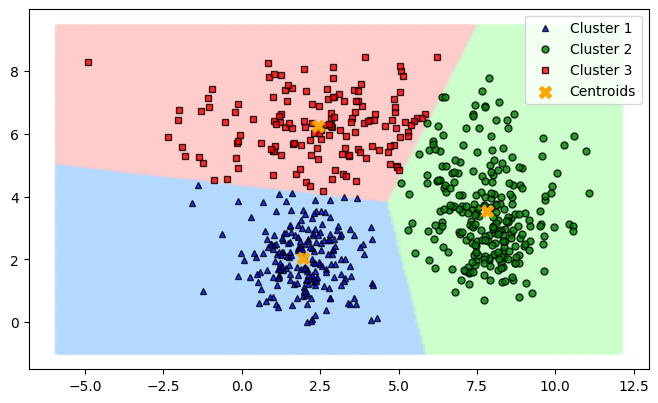

33


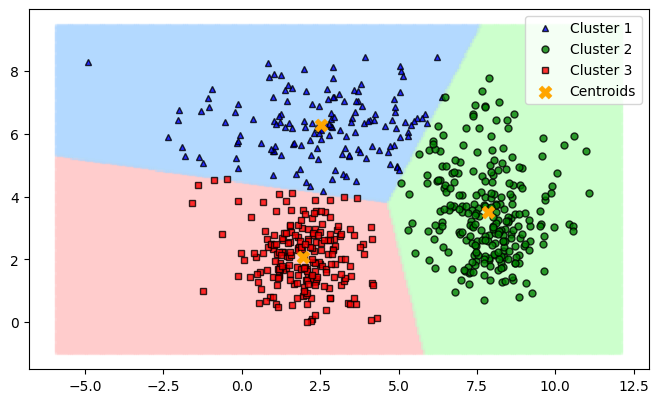

27


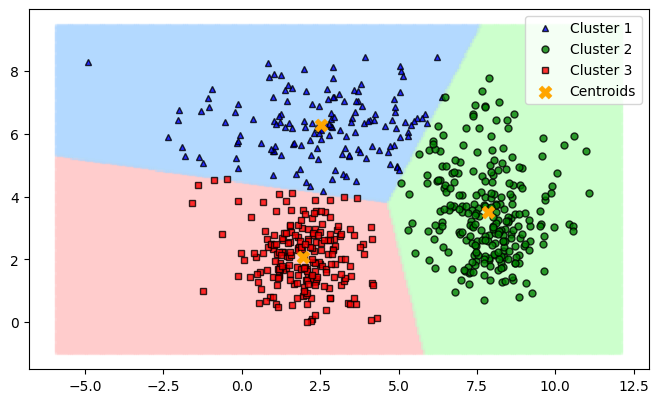

In [35]:
for i in [10, 33, 27]:
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    it = len(labels) - 1
    print(i)
    kmeans_display_with_background(clusters, centroids, labels, it)

Kết quả phân cụm ổn định, nhưng số vòng lặp và độ chính xác vẫn phụ thuộc vào khởi tạo ban đầu

TÓM LẠI:

Phân phối 
$\mathcal{N}((3, 6), \Sigma_2)$
  có phương sai lớn theo trục X, khiến cụm dữ liệu bị kéo dài và phân tán. Điều này vi phạm giả định của K-Means về các cụm có hình cầu và kích thước tương đương, dẫn đến:

- Tâm cụm khó xác định chính xác
- Ranh giới giữa các cụm bị mờ
- Dễ xảy ra phân cụm sai

→ Kết quả là K-Means hoạt động kém hiệu quả hơn với cụm này so với các cụm có phương sai đồng đều.